In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=2.5)  

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

grade_colors = {
    'A+': '#1a9850',  # Dark green
    'A': '#66bd63',   # Green
    'B': '#a6d96a',   # Light green
    'C': '#fdae61',   # Yellow
    'D': '#f46d43',   # Orange
    'E': '#e6550d',   # Dark orange
    'F': '#d73027'    # Red
}

def format_func(value, tick_number):
    if value >= 1000000:
        return f'{value/1000000:.0f}M'
    elif value >= 1000:
        return f'{value/1000:.0f}k'
    else:
        return f'{value:.0f}'

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame(data['ProjectFindings'])

    plt.figure(figsize=(12, 8))

    scatter = plt.scatter(df['LinesOfCode'], df['Findings'], 
                          c=[grade_colors[grade] for grade in df['Grade']], 
                          s=100, alpha=0.7)

    plt.xscale('log') 
    plt.xlabel('Lines of Code')
    plt.ylabel('Number of Findings')

    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_func))

    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

    colorbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.RdYlGn_r), ax=plt.gca())
    colorbar.set_ticks([0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 0.99])
    colorbar.set_ticklabels(['A+', 'A', 'B', 'C', 'D', 'E', 'F'])

    colorbar.set_label('Grade')

    plt.tight_layout()

    output_filename = f"findings_vs_loc_{os.path.basename(file_path).split('.')[0]}.pdf"
    plt.savefig(os.path.join('output1', output_filename), format='pdf', bbox_inches='tight')

    plt.close()

input_dir = 'input'
for filename in os.listdir(input_dir):
    if filename.endswith('.json'):
        file_path = os.path.join(input_dir, filename)
        process_file(file_path)

print("All plots have been generated and saved in the 'output' directory.")

All plots have been generated and saved in the 'output' directory.


Individual plots have been generated and saved in the 'output2' directory.


C:\Users\phili\AppData\Local\Temp\ipykernel_30176\1273042321.py:85: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  reversed_cmap = plt.cm.get_cmap('RdYlGn_r').reversed()


Composite plot has been generated and saved as 'composite_plot.pdf' in the 'output2' directory.


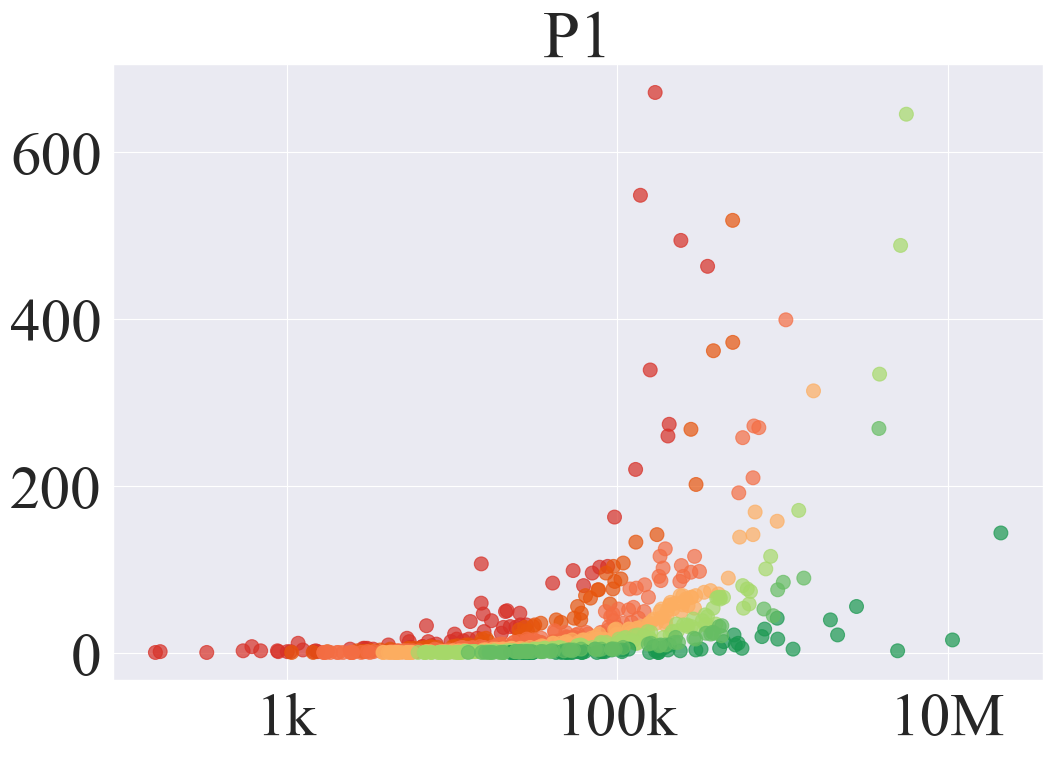

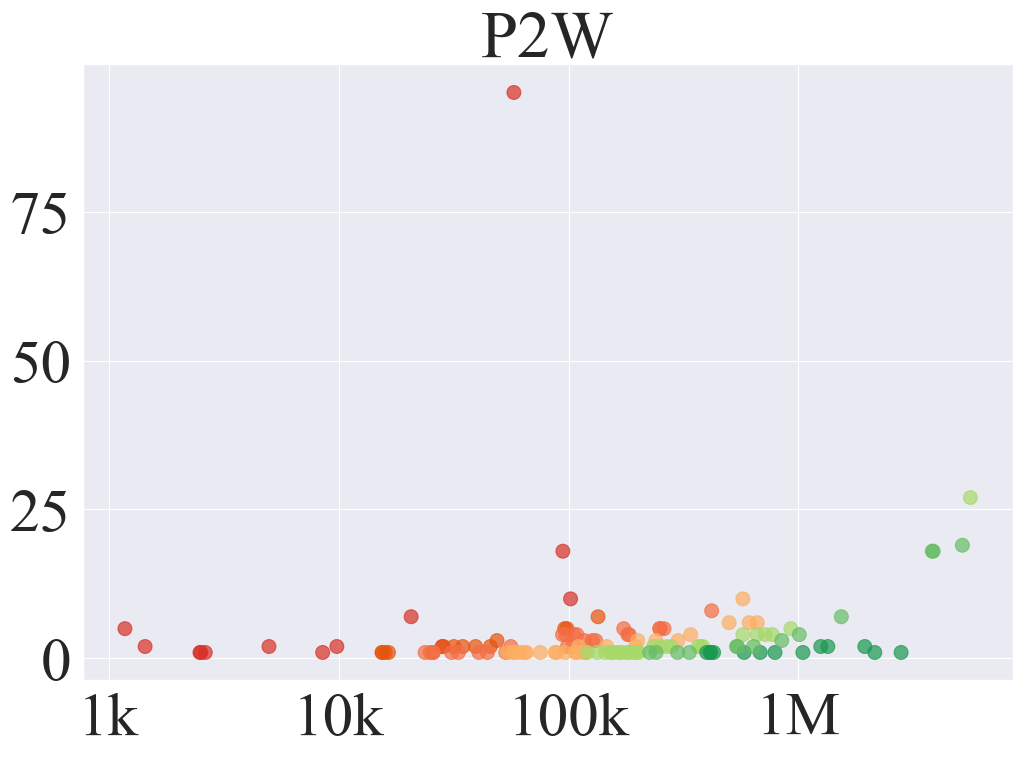

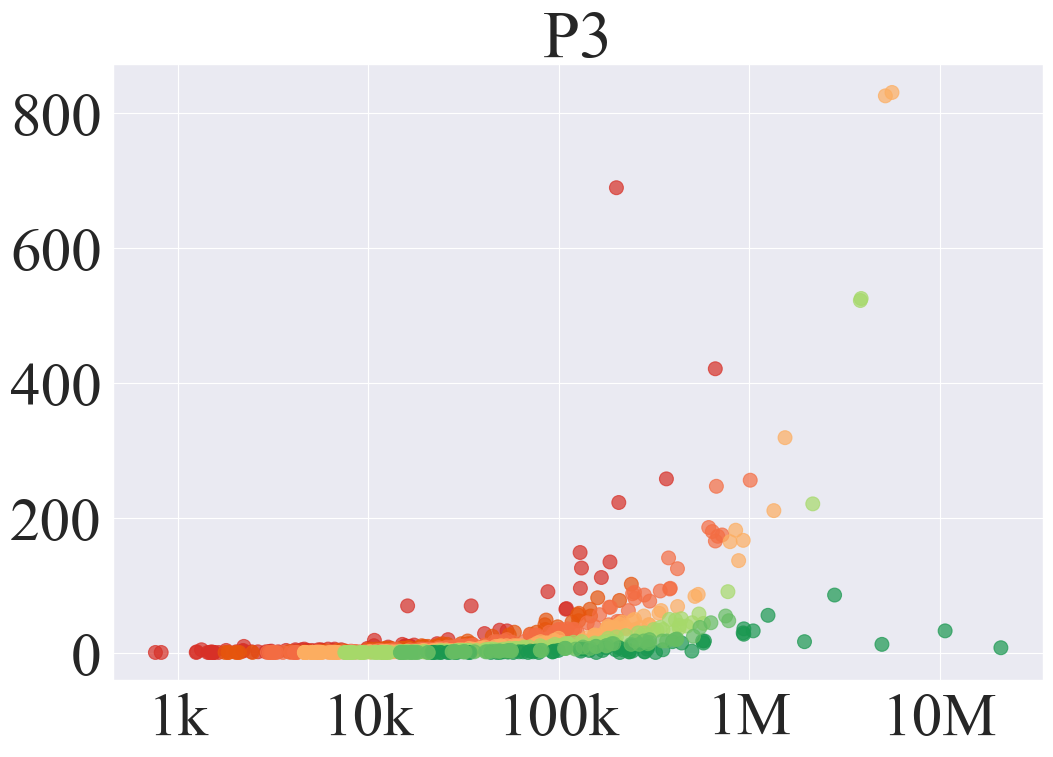

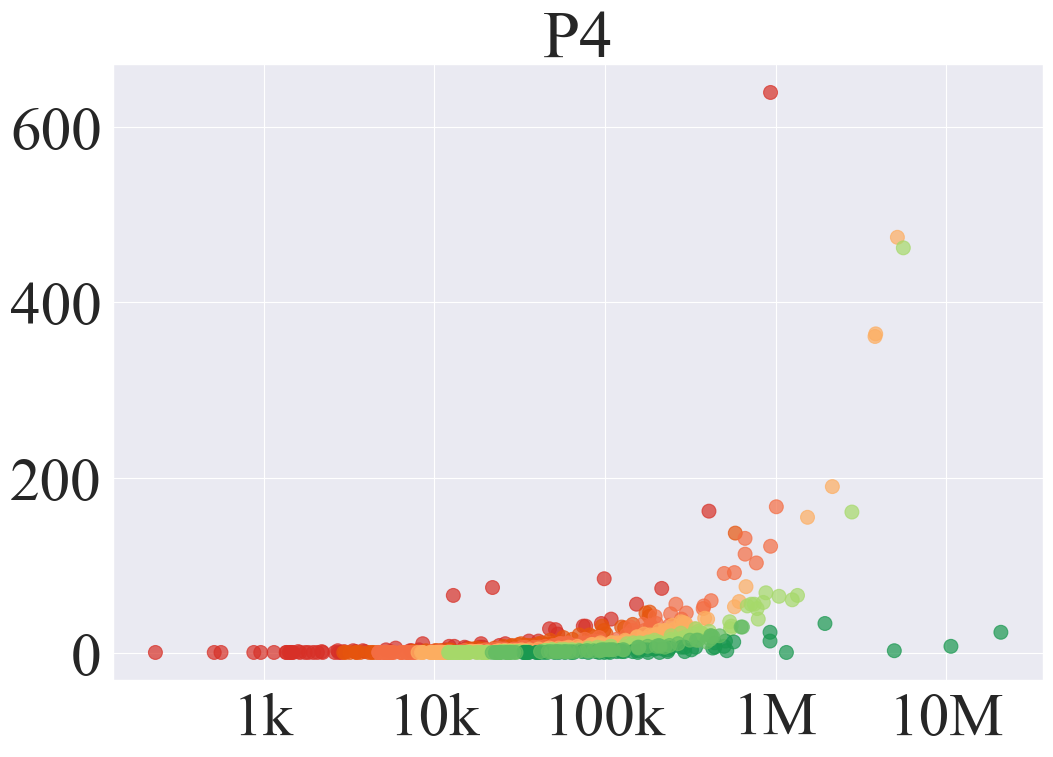

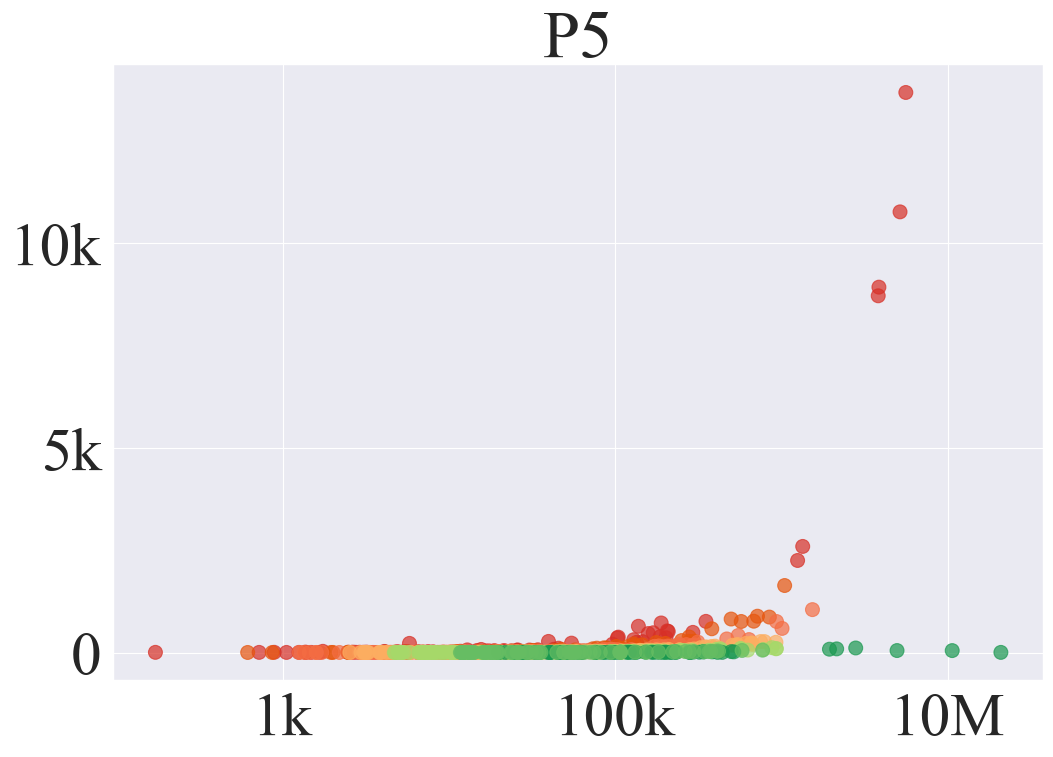

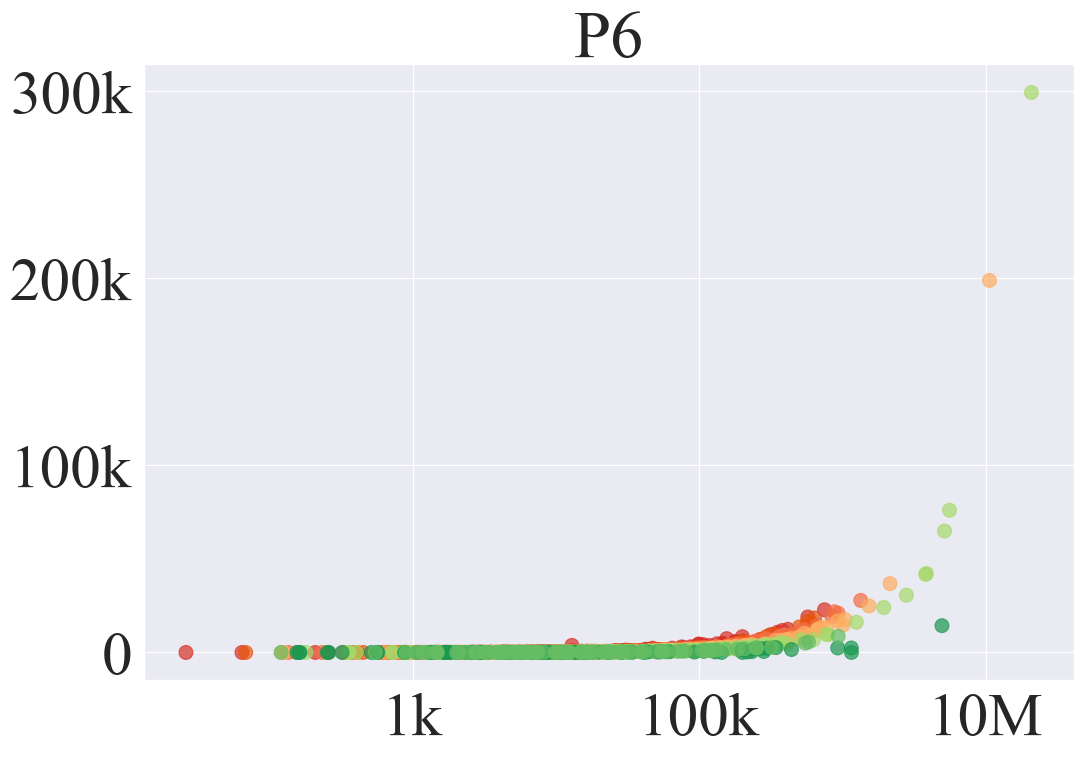

In [7]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_theme(style="darkgrid")
sns.set_context("paper", font_scale=5)  

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

grade_colors = {
    'A+': '#1a9850',  # Dark green
    'A': '#66bd63',   # Green
    'B': '#a6d96a',   # Light green
    'C': '#fdae61',   # Yellow
    'D': '#f46d43',   # Orange
    'E': '#e6550d',   # Dark orange
    'F': '#d73027'    # Red
}

def format_func(value, tick_number):
    if value >= 1000000:
        return f'{value/1000000:.0f}M'
    elif value >= 1000:
        return f'{value/1000:.0f}k'
    else:
        return f'{value:.0f}'

def process_file(file_path, ax=None, show_x_label=False, show_y_label=False):
    with open(file_path, 'r') as f:
        data = json.load(f)

    df = pd.DataFrame(data['ProjectFindings'])

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))

    scatter = ax.scatter(df['LinesOfCode'], df['Findings'], 
                         c=[grade_colors[grade] for grade in df['Grade']], 
                         s=100, alpha=0.7)

    ax.set_xscale('log')
    if show_x_label:
        ax.set_xlabel('Lines of Code')
    if show_y_label:
        ax.set_ylabel('Number of Findings')
    ax.set_title(os.path.basename(file_path).split('.')[0])

    ax.xaxis.set_major_formatter(FuncFormatter(format_func))
    ax.yaxis.set_major_formatter(FuncFormatter(format_func))

    if ax is None:
        plt.tight_layout()
        output_filename = f"findings_vs_loc_{os.path.basename(file_path).split('.')[0]}.pdf"
        plt.savefig(os.path.join('output2', output_filename), format='pdf', bbox_inches='tight')
        plt.close()

    return ax

input_dir = 'input'
file_paths = [os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.endswith('.json')]

for file_path in file_paths:
    process_file(file_path)

print("Individual plots have been generated and saved in the 'output2' directory.")

fig, axs = plt.subplots(2, 3, figsize=(36, 24))

for i, file_path in enumerate(file_paths[:6]):  # Use only the first 6 files
    row = i // 3
    col = i % 3
    show_x_label = row == 1  # Show x-label on bottom row
    show_y_label = col == 0  # Show y-label on left column
    ax = process_file(file_path, ax=axs[row, col], show_x_label=show_x_label, show_y_label=show_y_label)
    
    reversed_cmap = plt.cm.get_cmap('RdYlGn_r').reversed()

    if i == 5:
        colorbar = fig.colorbar(plt.cm.ScalarMappable(cmap=reversed_cmap), ax=ax)
        colorbar.set_ticks([0.06,0.2,0.35,0.5,0.65,0.8,0.95])
        colorbar.set_ticklabels(['F', 'E', 'D', 'C', 'B', 'A', 'A+'])
        colorbar.set_label('Grade')

plt.tight_layout()
plt.savefig('output2/sat_scatter_plot.pdf', format='pdf', bbox_inches='tight')
plt.close()

print("Composite plot has been generated and saved as 'composite_plot.pdf' in the 'output2' directory.")

In [9]:
import os
import json
from operator import itemgetter

def process_file(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)

    # Sort projects by Ratio in descending order
    sorted_projects = sorted(data['ProjectFindings'], key=itemgetter('Ratio'), reverse=True)

    # Get the top 5 projects (or all if less than 5)
    top_projects = sorted_projects[:min(5, len(sorted_projects))]

    return top_projects

def main():
    input_dir = 'input'
    output_file = 'output3/worst_5_projects.txt'

    with open(output_file, 'w') as out_f:
        for filename in os.listdir(input_dir):
            if filename.endswith('.json'):
                file_path = os.path.join(input_dir, filename)
                pattern_id = filename.split('.')[0]  # Assuming filename format is 'p<pattern_id>.json'

                out_f.write(f"Pattern: {pattern_id}\n")
                out_f.write("Top 5 Projects:\n")

                top_projects = process_file(file_path)

                for project in top_projects:
                    out_f.write(f"  Project: {project['ProjectName']}\n")
                    out_f.write(f"    Findings: {project['Findings']}\n")
                    out_f.write(f"    Lines of Code: {project['LinesOfCode']}\n")
                    out_f.write(f"    Ratio: {project['Ratio']:.8f}\n")
                    out_f.write(f"    Grade: {project['Grade']}\n")
                    out_f.write("\n")

                out_f.write("\n")

        print(f"Results have been written to {output_file}")

if __name__ == "__main__":
    main()

Results have been written to output3/worst_5_projects.txt


In [11]:
import json
from operator import itemgetter

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def sort_projects(data):
    return sorted(data, key=itemgetter('AverageScore'), reverse=True)

def format_table_row(project):
    return f"{project['ProjectName']} & {project['OverallGrade']} & {project['IndividualGrades']['p1']} & {project['IndividualGrades']['p2b']} & {project['IndividualGrades']['p2w']} & {project['IndividualGrades']['p3']} & {project['IndividualGrades']['p4']} & {project['IndividualGrades']['p5']} & {project['IndividualGrades']['p6']} \\\\"

def create_table(sorted_projects):
    table = [
        r"\begin{table}[]",
        r"\centering",
        r"\begin{tabular}{@{}lllllllll@{}}",
        r"\toprule",
        r"Project Name & Overall Grade & P1 & P2B & P2W & P3 & P4 & P5 & P6 \\ \midrule"
    ]
    
    # Add top 2 projects
    table.extend([format_table_row(project) for project in sorted_projects[:2]])
    
    table.append(r"\midrule")
    
    # Add 3 worst projects
    table.extend([format_table_row(project) for project in sorted_projects[-3:]])
    
    table.extend([
        r"\bottomrule",
        r"\end{tabular}",
        r"\caption{Best and worst performing projects.}",
        r"\label{tab:overall-top}",
        r"\end{table}"
    ])
    
    return "\n".join(table)

def write_table_to_file(table, output_file):
    with open(output_file, 'w') as file:
        file.write(table)

def main():
    input_file = 'input/combined_results.json'
    output_file = 'project_performance_table.txt'
    
    data = read_json_file(input_file)
    print(f"amount of projects: {len(data)}")
    sorted_projects = sort_projects(data)
    table = create_table(sorted_projects)
    write_table_to_file(table, output_file)
    print(f"Table has been written to {output_file}")

if __name__ == "__main__":
    main()

amount of projects: 1010
Table has been written to project_performance_table.txt
